Digital Business University of Applied Sciences  
Studiengang: Data Science and Business Analytics (B. Sc.)  
Modulbezeichnung: 12. Data Mining  
Dozent: Daniel Ambach  

***Studienarbeit Data Mining***   
*Clusteranalyse Kreditkarten-Datensatz*  


Eingereicht von: Brintzinger Conny  
Matrikelnummer: 190044  
Datum: 30.01.2022  

# Einleitung

# Clustering Methode / Theorie
 (2 Absätze)

- Beschreibt eure Methode und auch die Theorie , kurz und knapp
- Ihr könnt hier Formeln verwenden
- Ihr nutzt die Literatur für die Verweise
- Literaturarbeit 


# Jupyter Notebook

In [1]:
import os 
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import missingno
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans 

## Datenimport

In [2]:
# Daten- Import
df = pd.read_csv(os.path.join("../input", "CC GENERAL_Clusteranalyse.csv"))
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Erste Einblicke

### Deskriptive Analyse  
Der Datensatz enthält Kundendaten von 8950 Kreditkarten-Kunden und jeweils 18 Variablen.    
Mit nur 314 (0,2%) fehlenden Werten ist der Datensatz nahezu vollständig.   
Es gibt keine Duplikate.  
Außer der Kunden-ID liegen alle Werte in numerischer oder kategorialer Form vor.  
Ein Großteil der Variablen enthält sehr schiefe Verteilungen und viele Ausreißer. Diese beiden Voraussetzungen sind für Analysen eher ungünstig und bedürfen besonderer Beachtung bei der Datenaufbereitung.

In [3]:
# Erste Einblicke via Pandas Profiling Report
df = pd.read_csv(os.path.join("../input", "CC GENERAL_Clusteranalyse.csv"))
profile_cc = ProfileReport(df, title='Pandas Profiling Report: CC GENERAL_Clusteranalyse.csv', explorative=True)
#profile_cc.to_file("report_cc.html")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Beschreibung der Features
CUST_ID : Identifikation des Kreditkarteninhabers (kategorisch)  
BALANCE : Saldo, der auf dem Konto verbleibt, um Einkäufe zu tätigen  
BALANCE_FREQUENCY : Wie häufig der Saldo aktualisiert wird, Wert zwischen 0 und 1 (1 = häufig aktualisiert, 0 = nicht häufig aktualisiert)  
PURCHASES : Betrag der Käufe, die vom Konto getätigt wurden  
ONEOFF_PURCHASES : Maximaler Kaufbetrag, der auf einmal getätigt wurde  
INSTALLMENTS_PURCHASES : Betrag der in Raten getätigten Käufe  
CASH_ADVANCE : Vom Nutzer geleistete Vorauskasse  
PURCHASES_FREQUENCY : Wie häufig werden die Einkäufe getätigt?CASH_ADVANCE_FREQUENCY Wert zwischen 0 und 1 (1 = häufig gekauft, 0 = nicht häufig gekauft)  
ONEOFF_PURCHASES_FREQUENCY : Wie häufig werden die Einkäufe auf einmal gezahlt? (1 = häufig gekauft, 0 = nicht häufig gekauft)  
PURCHASES_INSTALLMENTS_FREQUENCY : Wie häufig werden Ratenkäufe getätigt (1 = häufig, 0 = nicht häufig)  
CASH_ADVANCE_FREQUENCY : Wie häufig wird die Vorauskasse gezahlt?  
CASH_ADVANCE_TRX : Anzahl der mit "Vorauskasse" getätigten Transaktionen  
PURCHASES_TRX : Anzahl der getätigten Kauftransaktionen  
CREDIT_LIMIT : Limit der Kreditkarte des Benutzers  
PAYMENTS : Betrag der vom Benutzer getätigten Zahlungen  
MINIMUM_PAYMENTS : Mindestbetrag der vom Benutzer getätigten Zahlungen  
PRC-FULL-PAYMENT : Prozentualer Anteil der vom Benutzer geleisteten vollständigen Zahlung  
TENURE : Laufzeit des Kreditkartenvertrages für den Benutzer  



## Data Understanding

### Duplikate entfernen
Es sind laut Pandas Profiling Report keine Diplikate enthalten.

In [25]:
# Find Duplicates
duplicates = df.duplicated(['CUST_ID'], keep=False).count()
duplicates # 8950 Einträge, keine Duplikate

8950

In [7]:
# zur Analyse Spalte CUST_ID (unique column) löschen
X = df.drop('CUST_ID', axis=1)
# X.head()

### Daten- Visualisierung

#### Durchschnitt, Minimum, Maximum, Quartile

In [8]:
# Durchschnitt, Minimum, Maximum, Quartile und Standardabweichung der Variablen
X.describe().T.style.background_gradient(cmap = 'Reds').set_precision(2)

#### Univariate Analyse / Verteilung innerhalb der Spalten
Die meisten Kreditkarteninhaber haben einen niedrigen Kreditrahmen und halten ihr Guthaben unter 7500 Dollar.  
Variablen wie Purchases, OneOffPurchases, Installmentpurchases und CashAdvances folgen demselben Trend wie das Guthaben und könnten alle miteinander korreliert sein. Also wenn das Guthaben niedrig ist, sind auch die Käufe niedrig und so weiter.  
Die meisten Kunden kaufen entweder gar nichts oder sie kaufen sehr häufig.  
Die Zahl der Ratenkäufe ist höher als die der einmaligen Käufe.  
In den letzten 6 Monaten haben die meisten Personen Gesamtzahlungen unter 10.000 Dollar geleistet, wobei die Mindestzahlungen unter 5.000 Dollar liegen.  
Die meisten Kreditkarteninhaber besitzen ihre Karte seit mehr als 12 Monaten. 

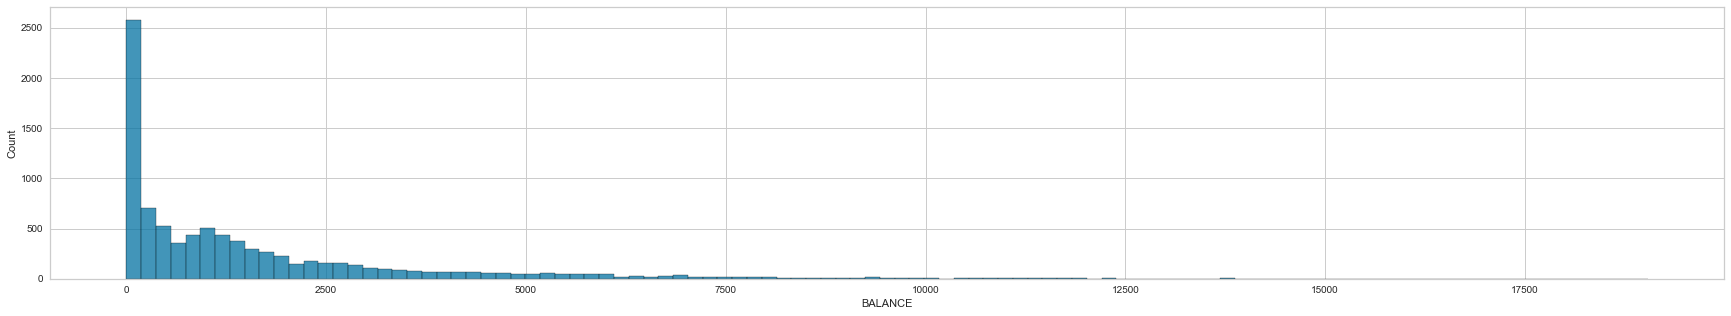

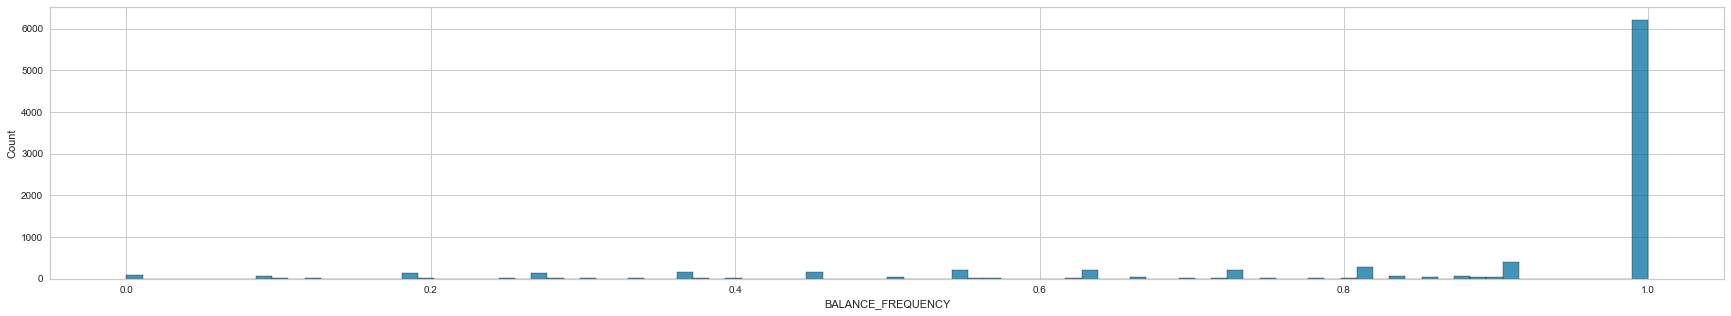

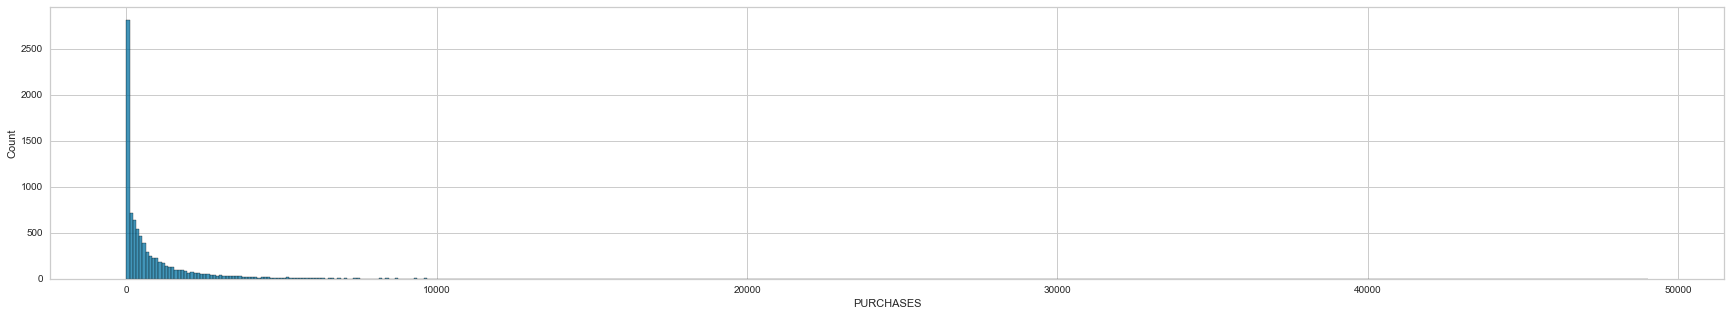

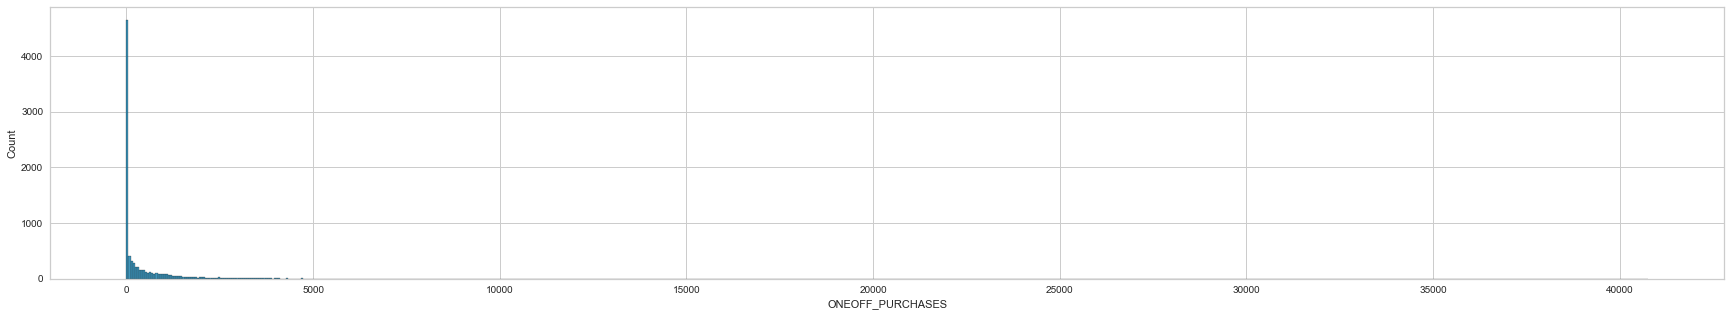

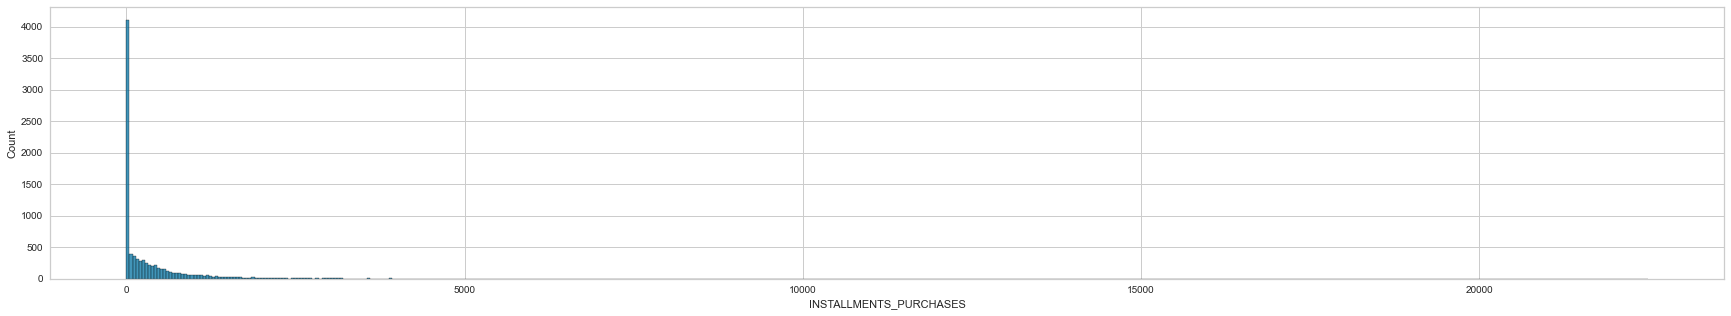

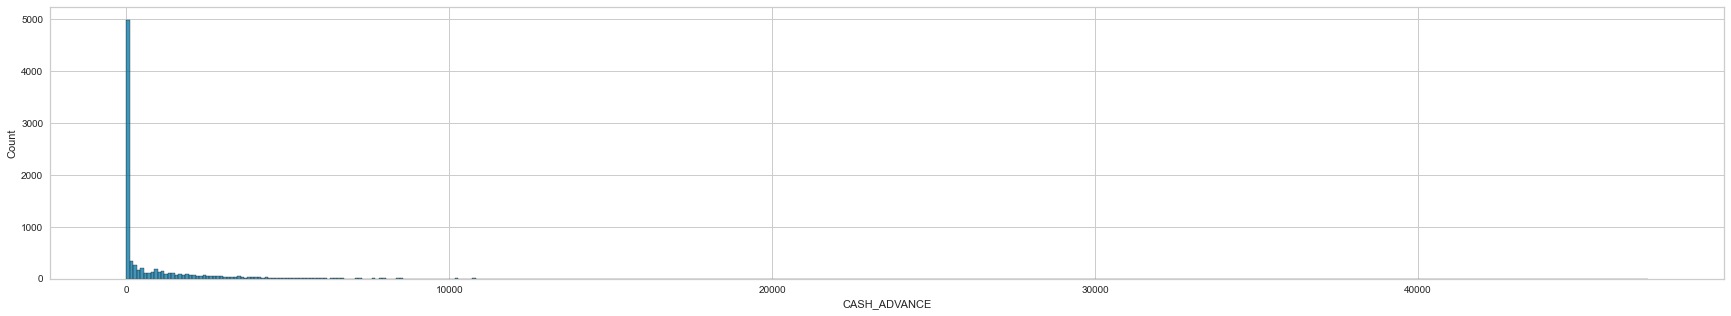

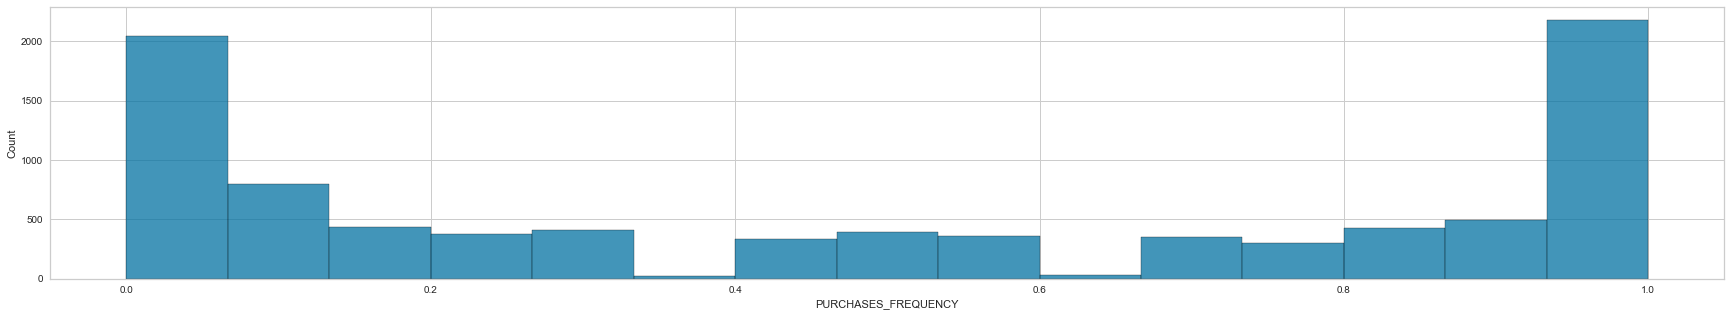

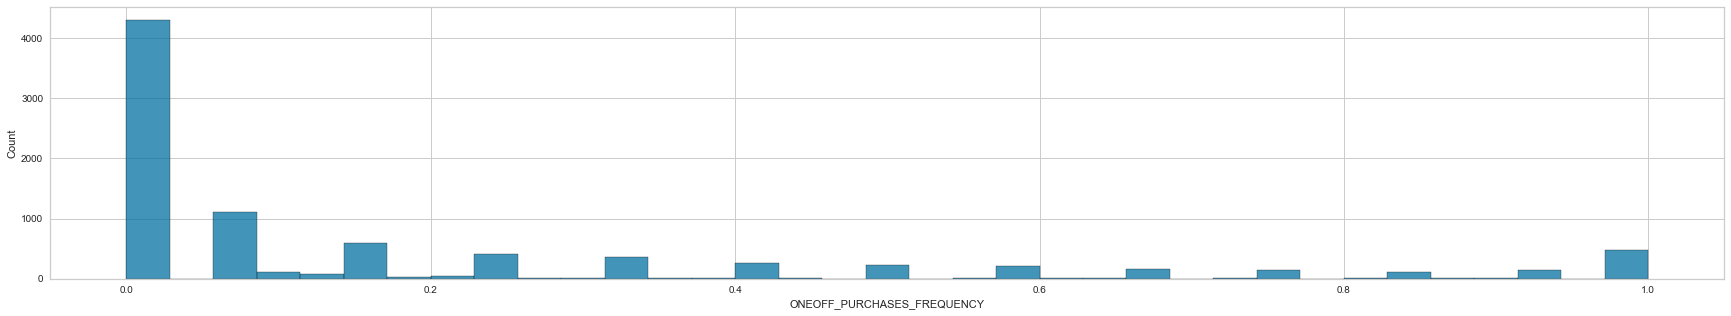

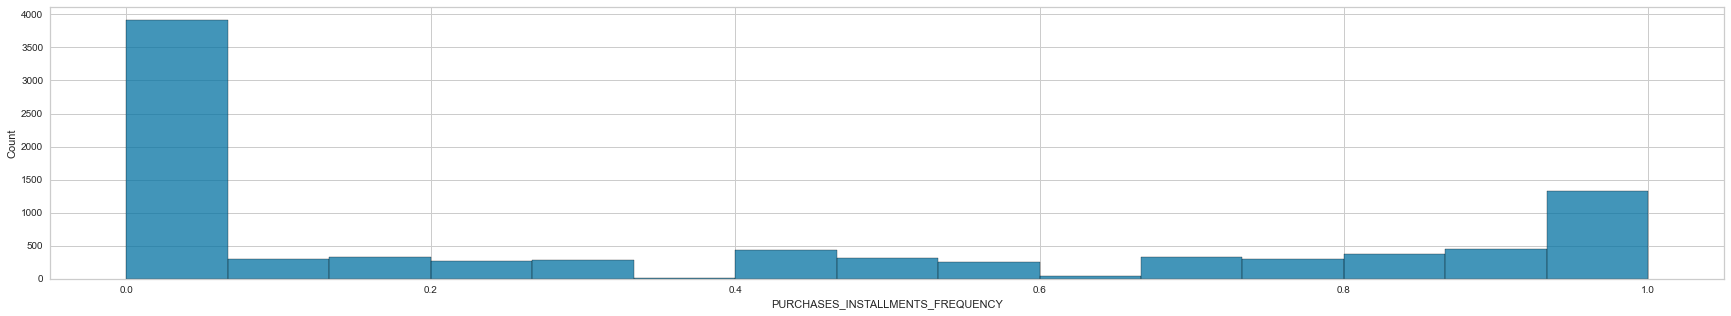

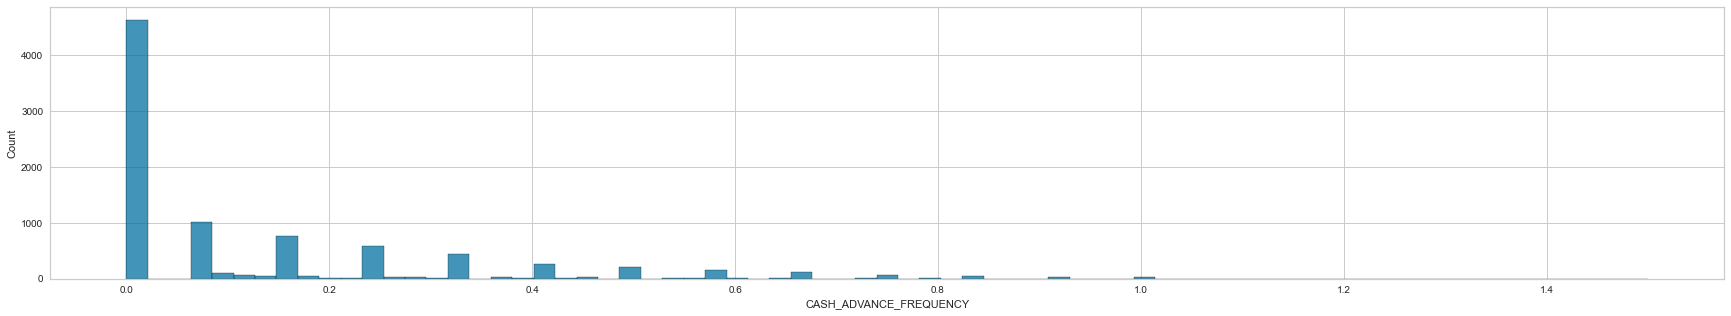

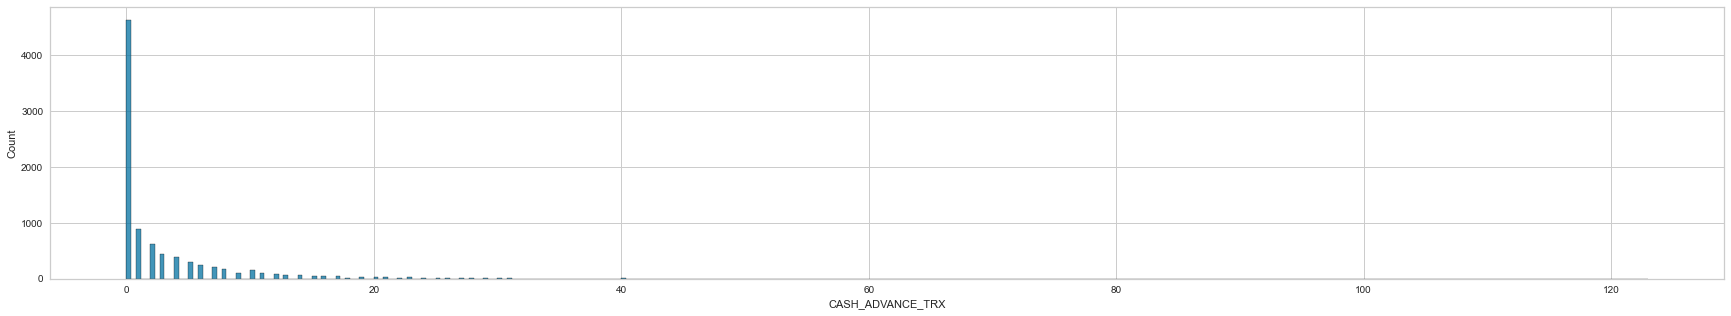

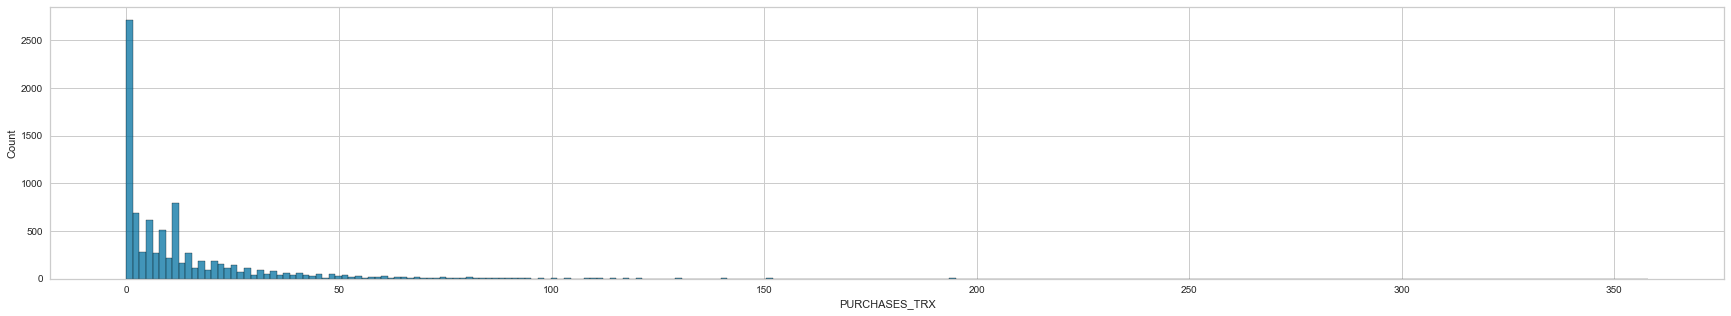

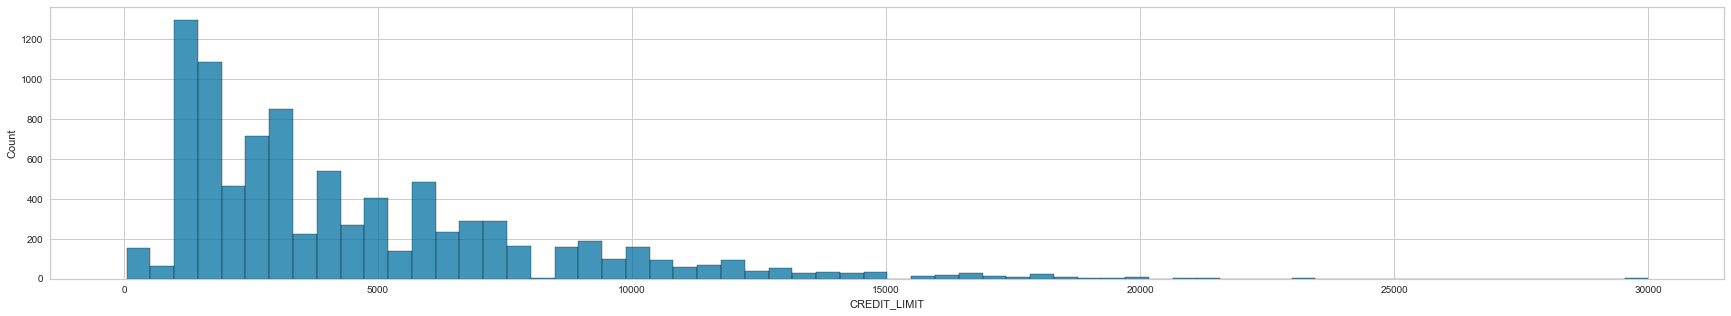

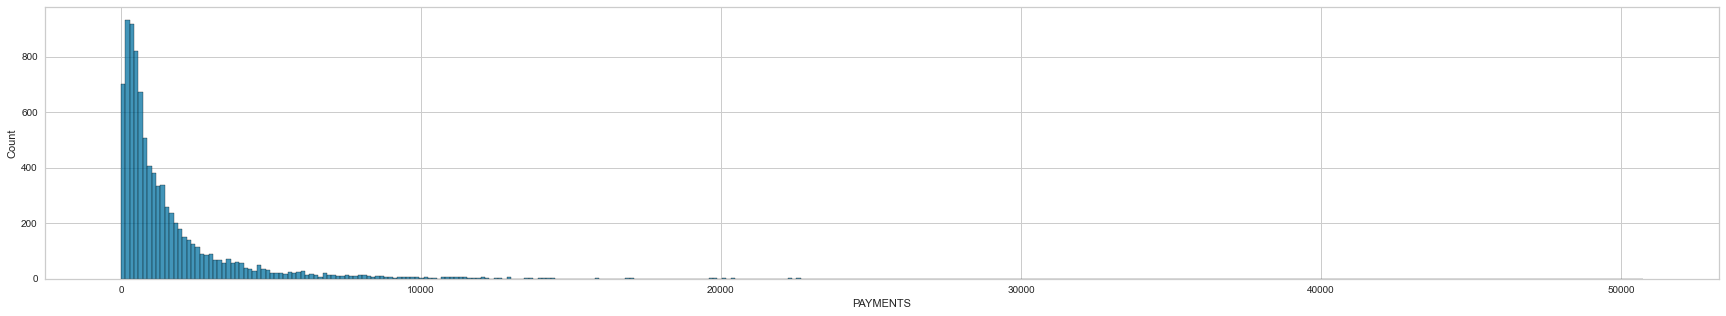

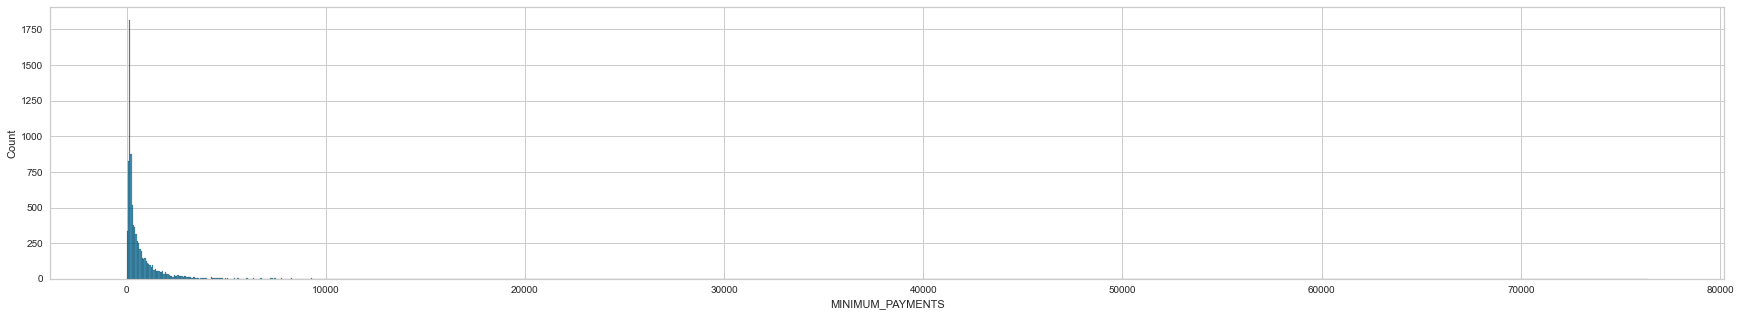

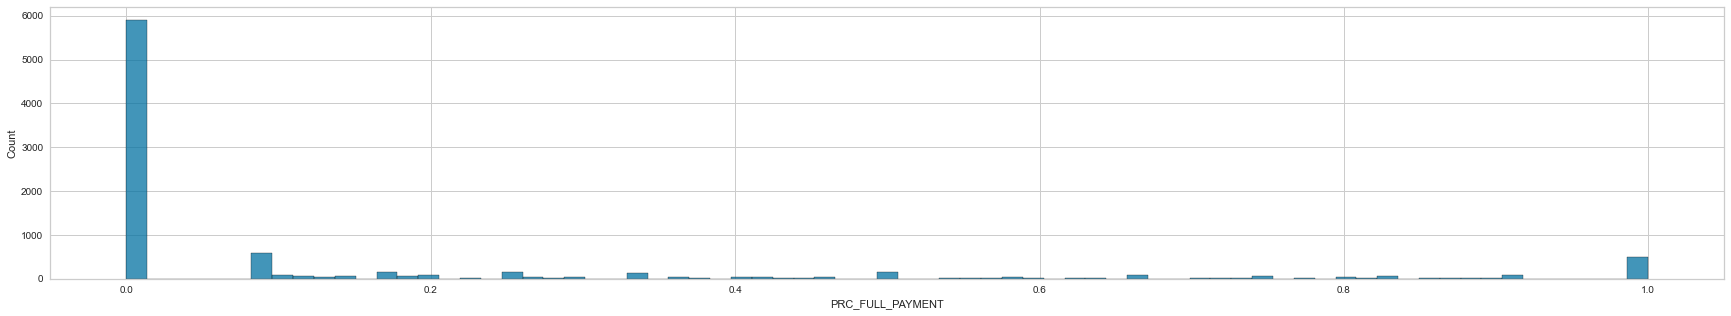

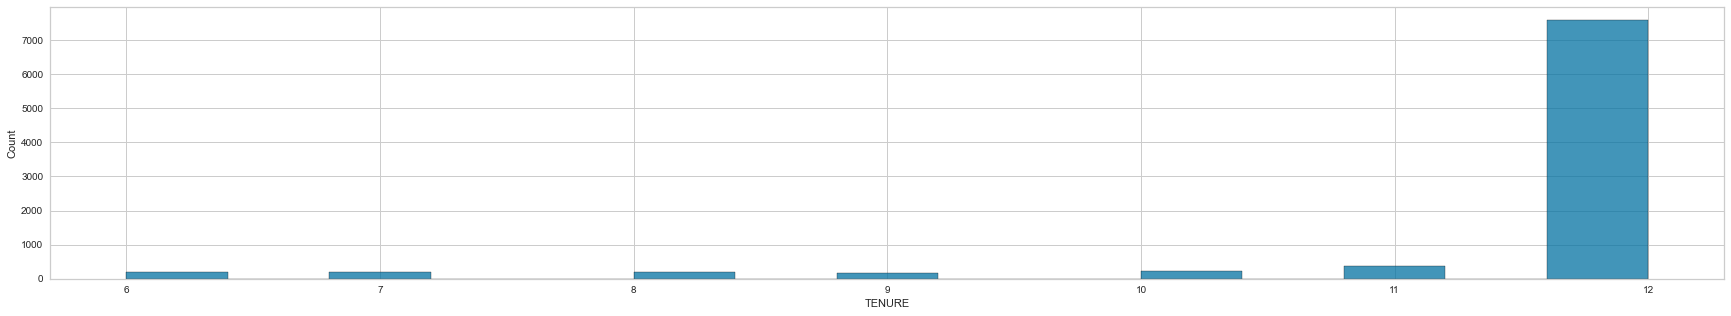

In [9]:
for column in X.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(X[column])
    plt.show()

#### Bivariate Analyse
Mit der Erhöhung des Kreditlimits (CREDIT_LIMIT)steigt auch der Saldo (BALANCE), so dass eine lineare Beziehung besteht.  
Mit zunehmender Zahl der Käufe (PURCHASES) nimmt die Zahl der "Vorauskasse"-Transaktionen (CASH_ADVANCE_TRX)ab.  
Wenn das Guthaben (BALANCE) niedrig ist, sind die Käufe, Einmalkäufe und Ratenkäufe geringer. Damit bestätigt sich unsere Annahme aus der univariaten Analyse.  
Käufe (PURCHASES), Einmalkäufe (ONEOFF_PURCHASES) und Ratenkäufe (INSTALLMENTS_PURCHASES) sind alle linear korreliert.  
Bei niedrigem Guthaben (BALANCE) sind die "Vorauskasse"-Transaktionen (CASH_ADVANCE_TRX) geringer.  

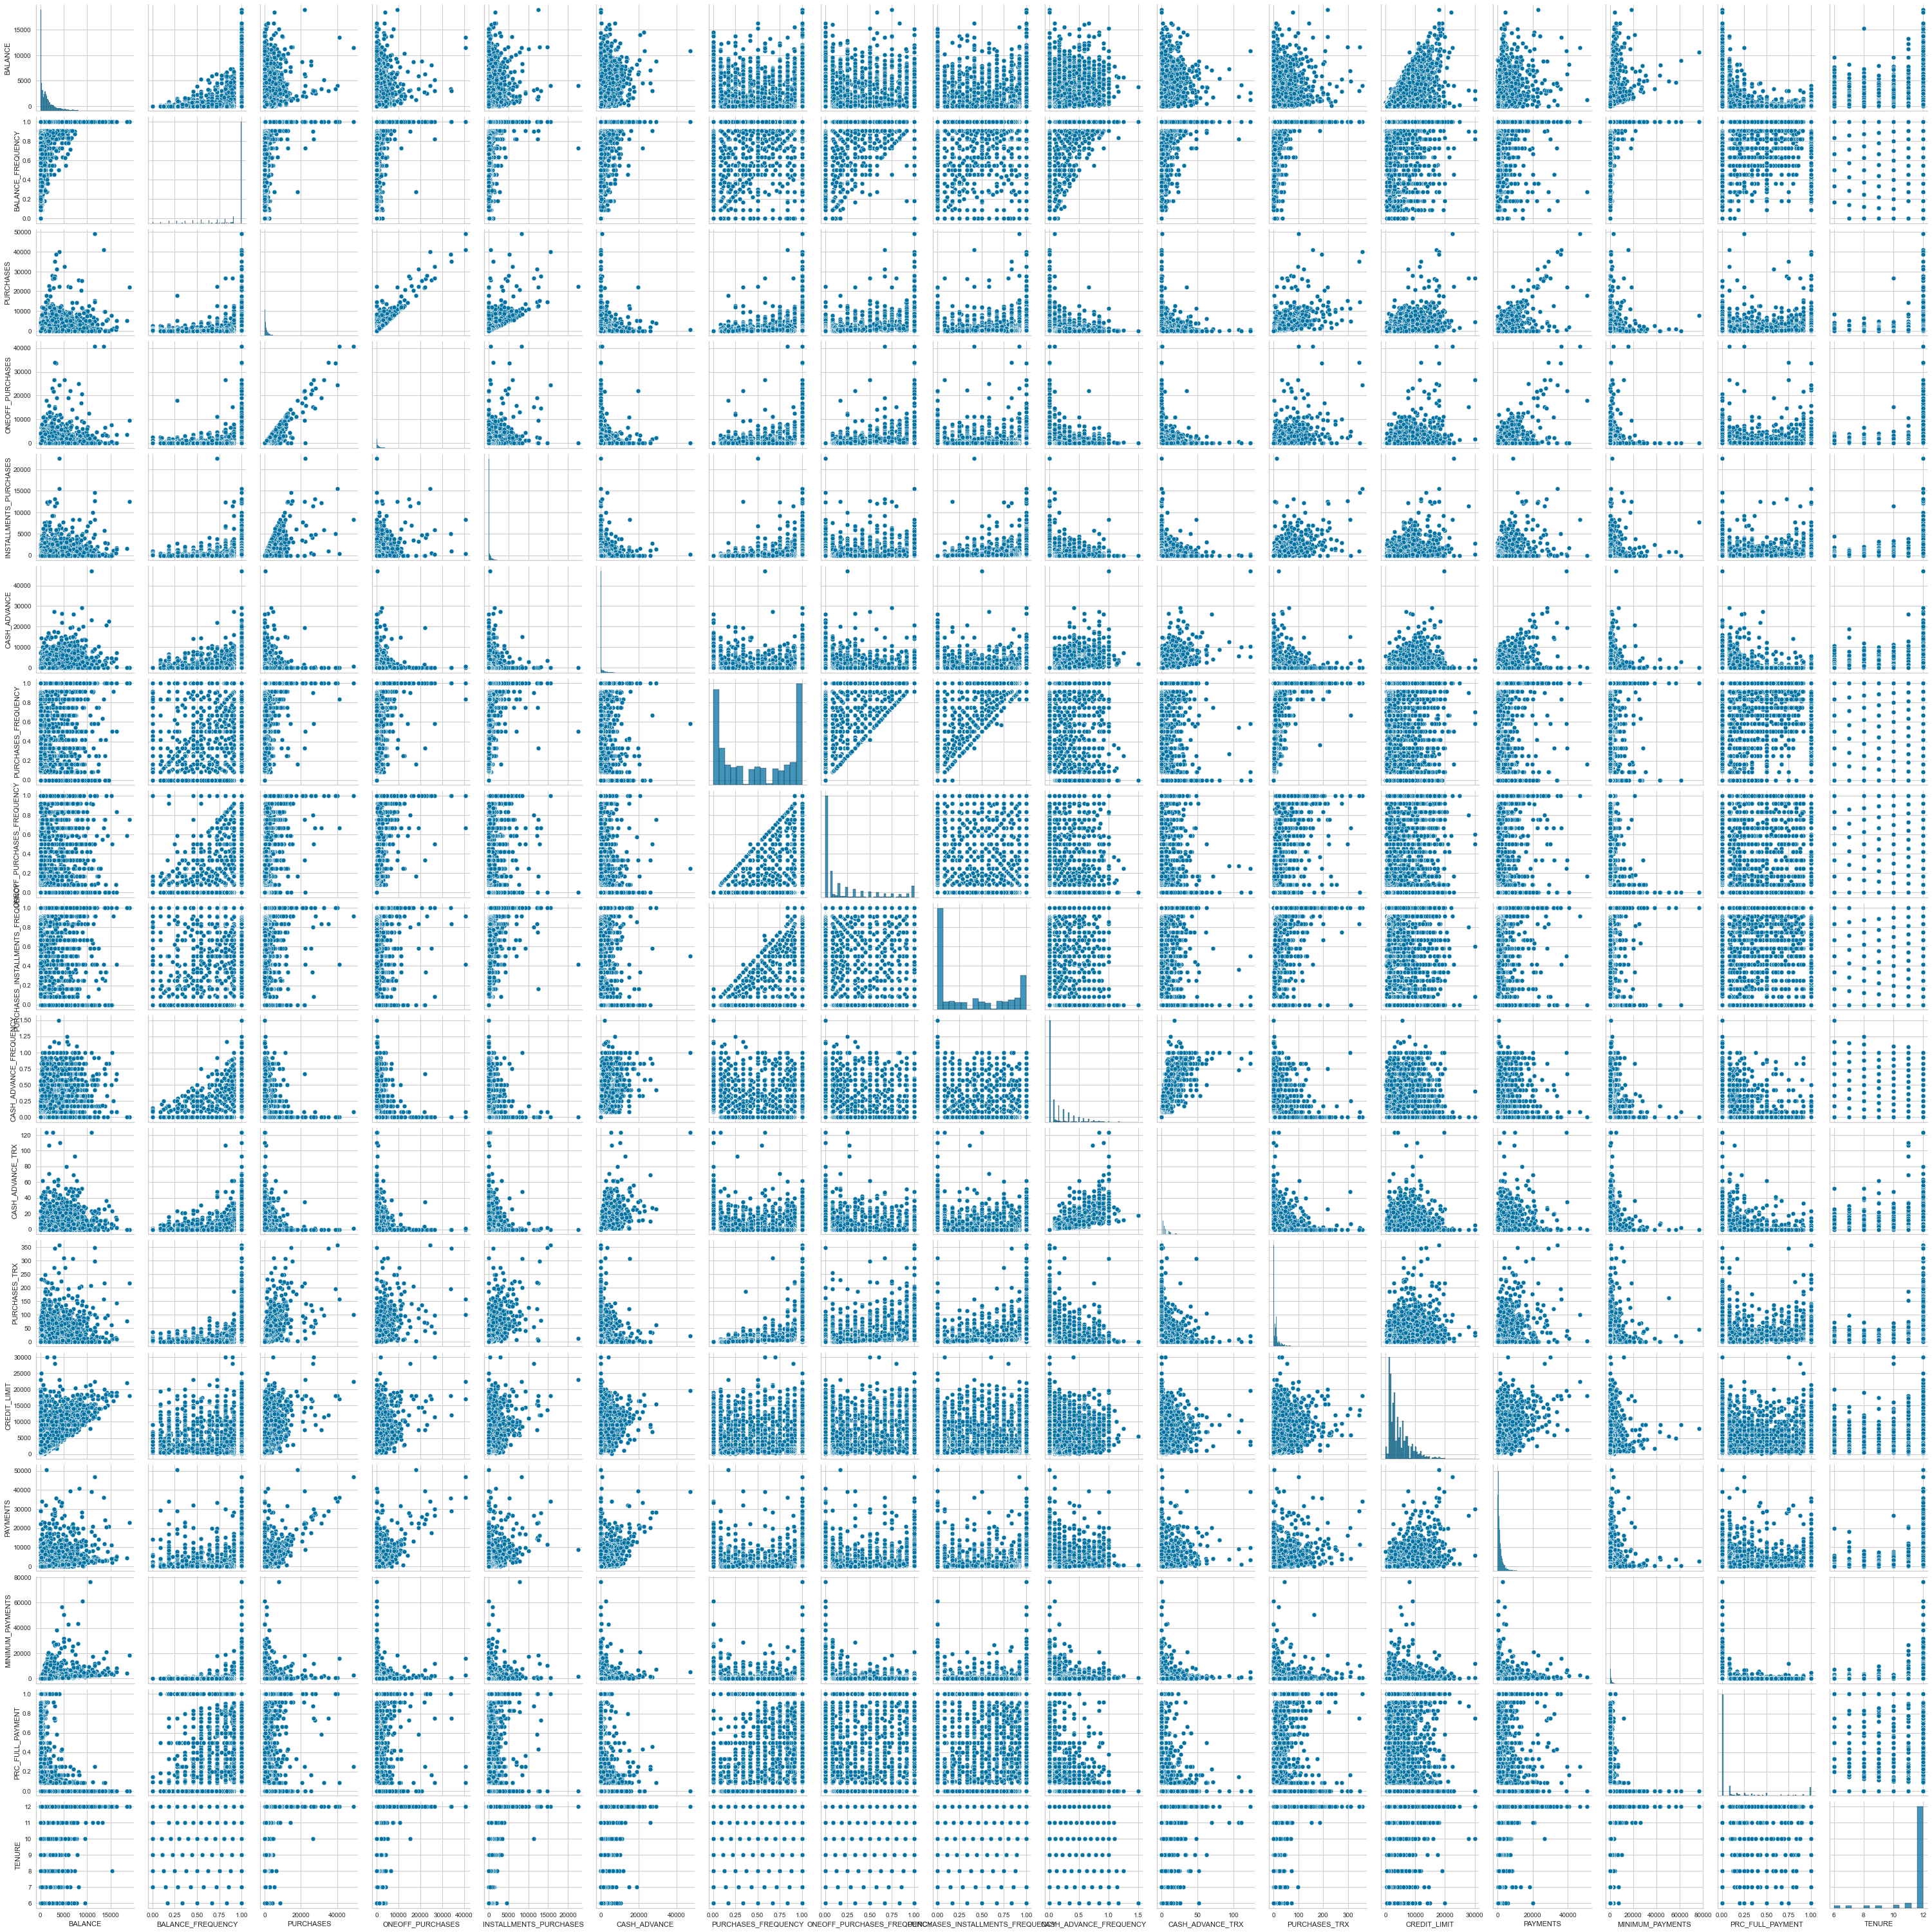

In [10]:
sns.pairplot(X)
plt.show()

#### Correaltion-Matrix

Am stärksten korreliert (in absteigender Reihenfolge) sind folgende Variablen:
- PURCHASES /                         ONEOFF_PURCHASES :                   0.92  
- PURCHASES_INSTALLMENTS_FREQUENCY /  PURCHASES_FREQUENCY :                0.86  
- CASH_ADVANCE_FREQUENCY /             CASH_ADVANCE_TRX :                   0.80  
- PURCHASES /                          PURCHASES_TRX :                      0.69  
- PURCHASES /                          INSTALLMENTS_PURCHASES :             0.68  
- CASH_ADVANCE  /                      CASH_ADVANCE_TRX :                   0.66  
- CASH_ADVANCE_FREQUENCY /             CASH_ADVANCE :                       0.63  
- PURCHASES  /                         PAYMENTS :                           0.60  

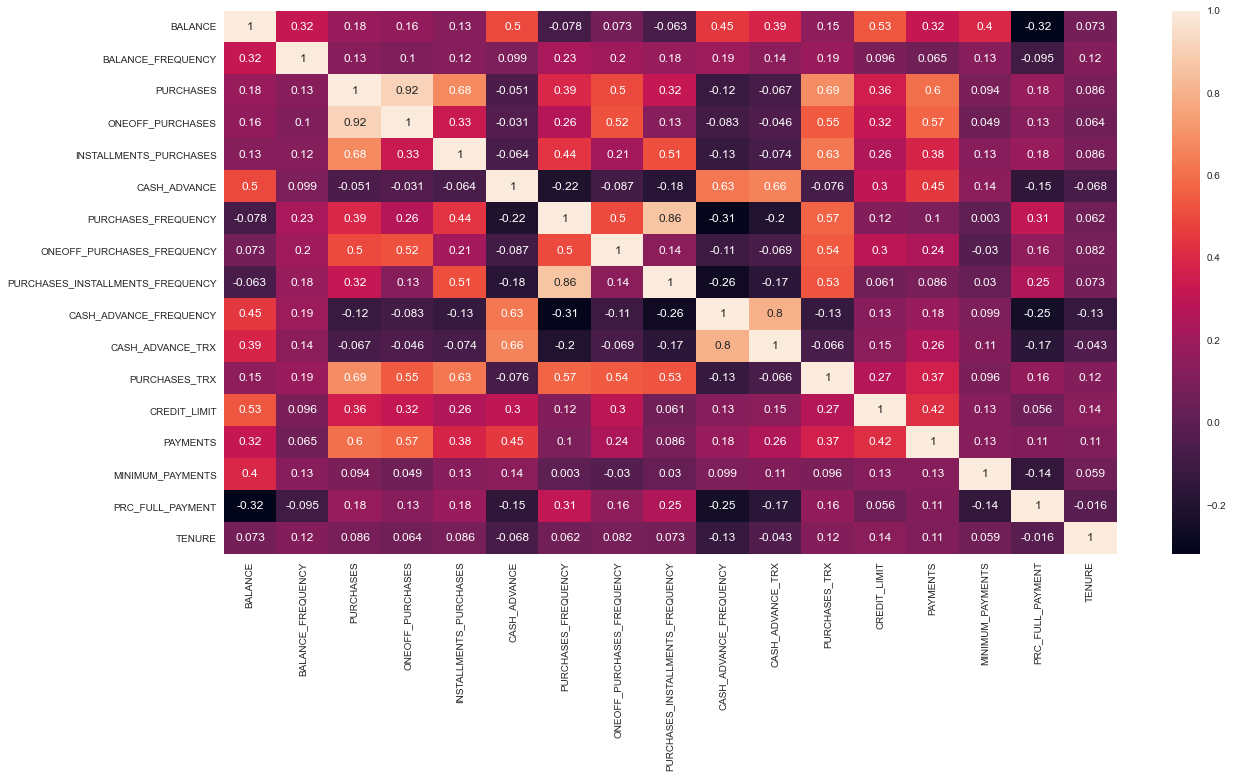

In [11]:
# helle Farben zeigen eine hohe Korrelation zwischen den Variablen an
correlations=df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True);

In [12]:
# Korrelation in absteigender Reihenfolge
corr = df.corr() 
filtered = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
c = filtered.abs().unstack()
c.sort_values(ascending = False).round(2).drop_duplicates()

PURCHASES                         ONEOFF_PURCHASES                    0.92
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.86
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE_TRX                    0.80
PURCHASES                         PURCHASES_TRX                       0.69
                                  INSTALLMENTS_PURCHASES              0.68
CASH_ADVANCE                      CASH_ADVANCE_TRX                    0.66
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.63
PURCHASES                         PAYMENTS                            0.60
PURCHASES_TRX                     PURCHASES_FREQUENCY                 0.57
ONEOFF_PURCHASES                  PURCHASES_TRX                       0.55
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_TRX                       0.54
BALANCE                           CREDIT_LIMIT                        0.53
ONEOFF_PURCHASES                  ONEOFF_PURCHASES_FREQUENCY          0.52
INSTALLMENTS_PURCHASES   

## Data Preprocessing
### Anforderungen an K-means-Eingabedaten:
- ausschließlich numerische Variablen.  
K-means verwendet distanzbasierte Messungen, um die Ähnlichkeit zwischen Datenpunkten zu bestimmen.
- Behandlung fehlender Werte   
k-Means-Clustering kann nicht mit fehlenden Werten umgehen. Daher müssen diese entweder gelöscht oder durch sinnvolle Werte ersetzt werden.
- Behandlung von Ausreißern  
K-means ist sehr empfindlich gegenüber Ausreißern und verrauschten Daten. Die Transformation der Daten in eine Normalverteilung hilft, die Auswirkungen dieser Probleme zu verringern. 
- Kategorische Variablen   
k-Means verwendet die Abstandsberechnung als Kernstück seines Algorithmus und kann daher kategorische Variablen nicht direkt verarbeiten. Es gibt zwei Möglichkeiten, wie dies gehandhabt werden kann: Umwandlung in binäre numerische Variablen oder in Ordinalvariablen  
- Standardisierung / Normalisierung der Daten   
Variablen auf der gleichen Skala haben den gleichen Mittelwert und die gleiche Varianz, normalerweise in einem Bereich von -1,0 bis 1,0 (standardisierte Daten) oder 0,0 bis 1,0 (normalisierte Daten).Damit der ML-Algorithmus alle Attribute als gleichwertig ansieht, müssen sie alle die gleiche Skala haben.
- keine Kollinearität (ein hohes Maß an Korrelation zwischen zwei Variablen)  
Korrelierte Variablen sind für ML-Segmentierungsalgorithmen nicht nützlich, da sie dasselbe Merkmal eines Segments darstellen. 
- Geringe Anzahl von Dimensionen  
Wenn die die einbezogenene Dimensionen einen gewissen Wert übersteigen, ist eine Interpretation des Abstands nicht möglich. Es müssen geeignete Techniken zur Dimensionalitätsreduzierung und Abstandsmaße verwendet werden.

### Missing Values
Grundsätzlich stehen zwei primäre Methoden zur Verfügung, um den Fehler zu beheben: Imputation oder das Entfernen von Daten.  

Bei der Imputationsmethode werden vernünftige Schätzungen für fehlende Daten angestellt. Sie ist am nützlichsten, wenn der Prozentsatz der fehlenden Daten gering ist. Wenn der Anteil der fehlenden Daten zu hoch ist, fehlt den Ergebnissen die natürliche Variation, die zu einem effektiven Modell führen könnte. Für die Imputatuion fehlender Werte stehen zahlreiche Methoden zur Verfügung- neben dem Durchschnitt, Median oder Modus stehen je nach Datentyp und Anwendung weitere Methoden zur Verfügung, wie Lineare Interpolation, K Nearest Neighbors oder spezielle Methoden für Zeitreihen.  

Die andere Möglichkeit besteht darin, Daten zu entfernen. Möglicherweise ist das nicht die beste Option, wenn nicht genügend Beobachtungen vorliegen, um eine zuverlässige Analyse zu erstellen. Auch ein Entfernen von nicht zufällig fehlenden Daten (z.B. keine Angabe beim Gehalt) würde die Analyse verzerren.

Bevor man sich also für einen Ansatz entscheidet, müssen wir verstehen, wieviele, welche und warum Daten fehlen.  
- Völlig willkürlich fehlende Werte:     
Es besteht kein systematischer Zusammenhang zwischen den fehlenden Werten einer Spalte und anderen oder eigenen Werten.  
- Zufällig fehlend:     
Es besteht ein systematischer Zusammenhang zwischen den fehlenden Werten einer Spalte und den anderen beobachteten Werten.  
- nicht zufällig fehlende Werte:     
Es besteht ein systematischer Zusammenhang zwischen den fehlenden Werten einer Spalte und unbeobachteten Werten.  


Der Datensatz ist mit nur 0,2% fehlenden Werten nahezu vollständig. Zur Vervollständigung der fehlenden Daten wird eine Imputation mittels der K Nearest Neighbors Methode angewendet, weil die Werte für MINIMUM_PAYMENTS sehr schief und von hohen Differenzen gekennzeichnet sind.Eine Imputation mit dem Durchschnittswert würde hier zu ungenaue Ergebnisse liefern (Min: 0, Max: 76406.21, Mean: 864.21).  
- 1  fehlende Angabe für CREDIT_LIMIT (< 0.1%)    
- 313  fehlende Werte für MINIMUM_PAYMENTS (3,5%) 


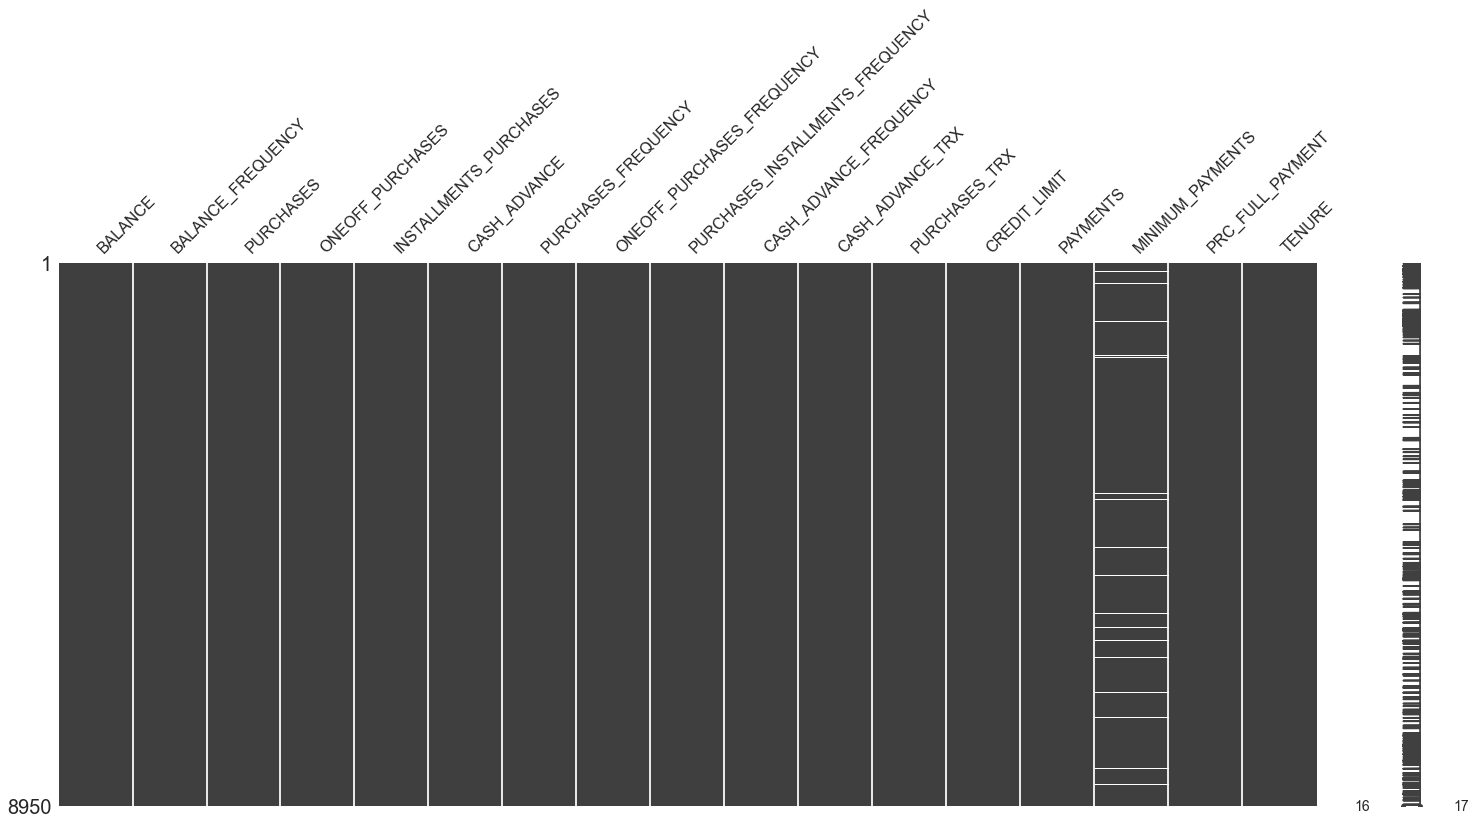

In [13]:
missingno.matrix(X);

In [14]:
# Missing Value anzeigen
X.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

In [15]:
# Ergänzen der fehlenden Werte durch Imputation
knn_imp = KNNImputer(n_neighbors=3)
X = pd.DataFrame(knn_imp.fit_transform(X), columns=X.columns)
X.isna().sum().sum()

0

### Ausreißer 

Einer der wichtigsten Schritte im Rahmen der Datenvorverarbeitung ist die Erkennung und Behandlung von Ausreißern, da diese die statistische Analyse und den Trainingsprozess eines Machine Learning Modells negativ beeinflussen und zu einer geringeren Genauigkeit führen können.  

Techniken zur Erkennung von Ausreißern beinhalten beispielsweise Boxplots, Histogramme, Scatterplots, Z-Score oder Inter-Quantil-Bereich (IQR).  

Methoden zur Behandlung von Ausreißern:
- Trimming / Removing the outlier
- Quantile based Flooring and Capping
- Mean / Median Imputation

Die vorliegenden Daten weisen sehr viele, teils extreme Ausreißer auf. 
(außer PURCHASES_FREQUENCY und PURCHASES_INSTALLMENTS_FREQUENCY)
Ausreißer können die Analyse-Ergebnisse stark beinflussen und zur fehlerhaften Clusterbildung führen.
Allerdings gibt es für die Behandlung von Ausreißern keine Standard-Vorgehensweise. Vielmehr sollte ähnlich wie bei fehlenden Werten aus dem Kontext entschieden werden. Da hier sehr viele Ausreißer zu beobachten sind, können diese nicht ignoriert und aus dem Datensatz gelöscht werden. Sie sind offensichtlich kein Fehler oder eine Ausnahme, sondern Teil der normalen Verteilung.

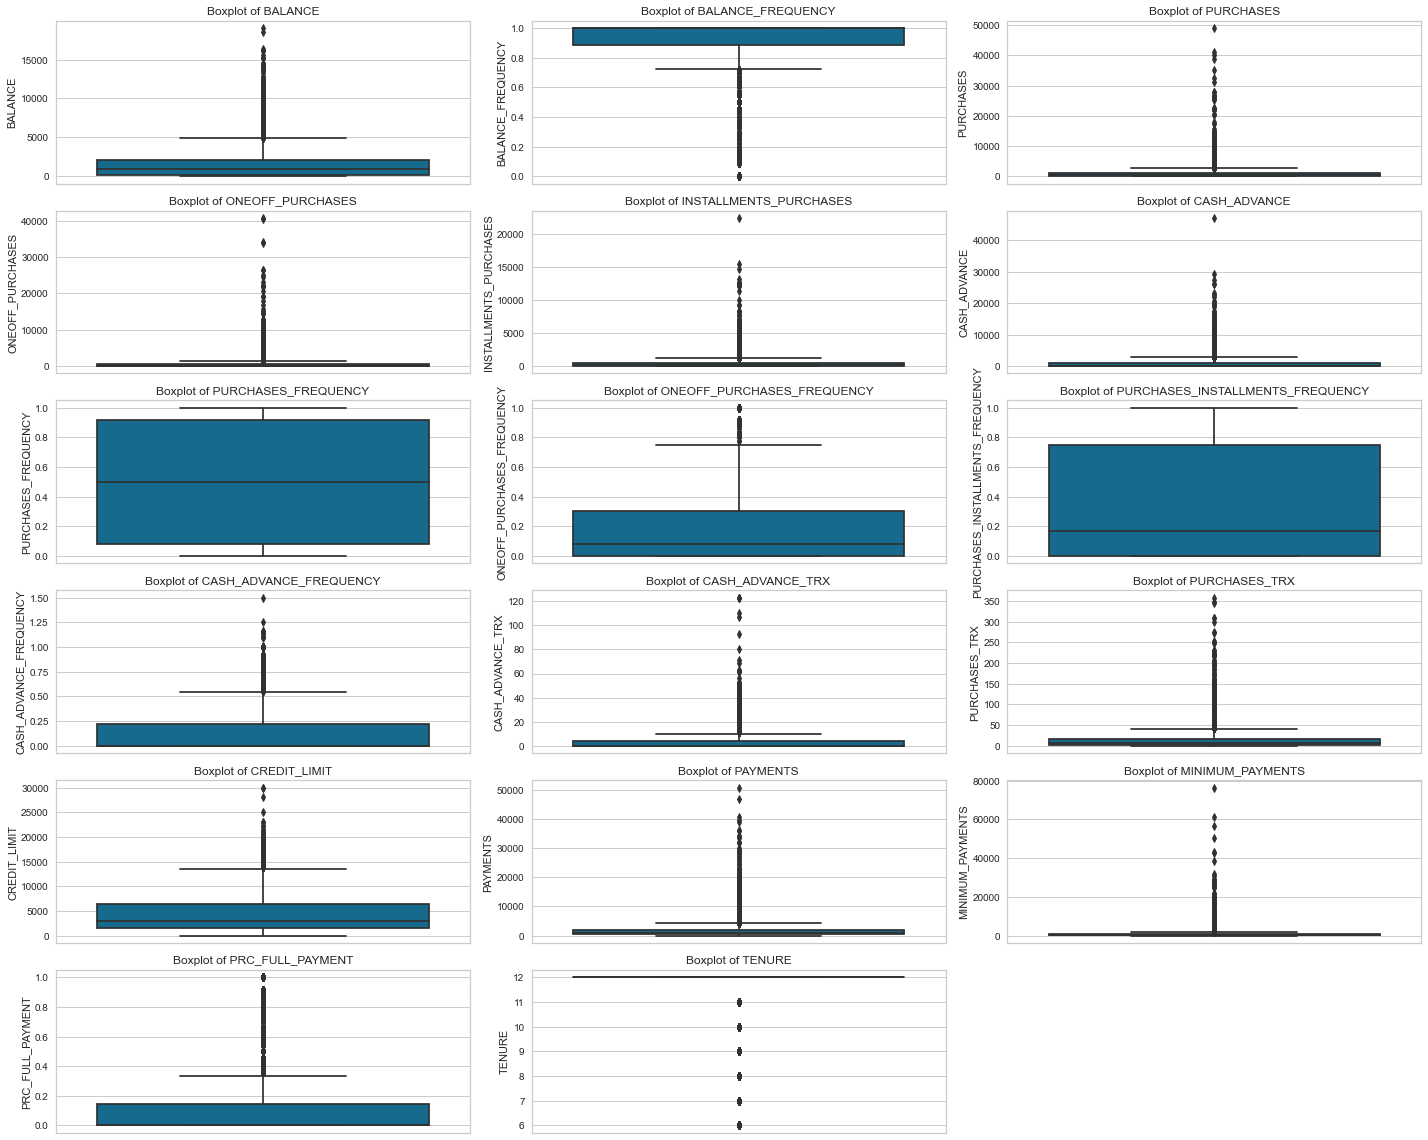

In [16]:
plt.figure(figsize = (20,16))
Features = X.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = X[Features[i]], data = X)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

Bei nur wenigen Ausreißern wäre grundsätzlich eine Bereinigung des Datensatzes in Frage gekommen. In diesem Fall wurden die Ausreißer im Datensatz belassen.  
Das ausgeblendete Beispiel zeigt eine Bereinigung des Datensatzes nach der Inter-Quantil-Bereich (IQR) Methode:

In [17]:
#def detect_outliers(col):
#    Q1, Q3 = col.quantile([0.25,0.75])
#    IQR = Q3 - Q1
#    lower_range = Q1 - (1.5 * IQR)
#    upper_range = Q3 + (1.5 * IQR)
#    return lower_range, upper_range

In [18]:
#Feature_list = X.columns
#for i in Feature_list:
#    lr, ur = detect_outliers(X[i])
#    X[i] = np.where(X[i] > ur, ur,X[i])
#    X[i] = np.where(X[i] < lr, lr,X[i])

In [19]:
#plt.figure(figsize = (20,16))
#Features = X.columns
#for i in range(len(Features)):
#    plt.subplot(6,3, i + 1)
#    sns.boxplot(y = X[Features[i]], data = X)
#    plt.title(f"Boxplot of {Features[i]}")
#    plt.tight_layout()

In [20]:
df_clean = pd.DataFrame(X)
#df_clean.head()

### Skaling (z-Score-Methode)

In [21]:
#Intilizing object of StandardScaler
zscore = StandardScaler() 
zscore.fit(df_clean)
df_scaled= pd.DataFrame(zscore.transform(df_clean),columns = df_clean.columns)
df_scaled.describe().T

count          mean       std       min  \
BALANCE                           8950.0 -2.540488e-17  1.000056 -0.751640   
BALANCE_FREQUENCY                 8950.0  1.587805e-16  1.000056 -3.703271   
PURCHASES                         8950.0  3.175610e-18  1.000056 -0.469552   
ONEOFF_PURCHASES                  8950.0 -6.033659e-17  1.000056 -0.356934   
INSTALLMENTS_PURCHASES            8950.0  3.175610e-17  1.000056 -0.454576   
CASH_ADVANCE                      8950.0 -4.763415e-18  1.000056 -0.466786   
PURCHASES_FREQUENCY               8950.0  9.010793e-17  1.000056 -1.221758   
ONEOFF_PURCHASES_FREQUENCY        8950.0  1.905366e-17  1.000056 -0.678661   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  5.716098e-17  1.000056 -0.916995   
CASH_ADVANCE_FREQUENCY            8950.0 -1.635439e-16  1.000056 -0.675349   
CASH_ADVANCE_TRX                  8950.0 -1.746585e-17  1.000056 -0.476070   
PURCHASES_TRX                     8950.0 -1.905366e-17  1.000056 -0.591796   
CREDIT_LIMIT                      8950.0  6.351220e-17  1.000056 -1.221432   
PAYMENTS                          8950.0  3.493171e-17  1.000056 -0.598688   
MINIMUM_PAYMENTS                  8950.0 -2.222927e-17  1.000056 -0.363292   
PRC_FULL_PAYMENT                  8950.0 -1.270244e-17  1.000056 -0.525551   
TENURE                            8950.0  2.921561e-16  1.000056 -4.122768   

                                       25%       50%       75%        max  
BALANCE                          -0.690008 -0.332029  0.235256   8.397489  
BALANCE_FREQUENCY                 0.049045  0.518084  0.518084   0.518084  
PURCHASES                        -0.451001 -0.300454  0.050047  22.483510  
ONEOFF_PURCHASES                 -0.356934 -0.334040 -0.009057  24.201066  
INSTALLMENTS_PURCHASES           -0.454576 -0.356156  0.063663  24.426889  
CASH_ADVANCE                     -0.466786 -0.466786  0.064352  22.011117  
PURCHASES_FREQUENCY              -1.014125  0.024043  1.062211   1.269843  
ONEOFF_PURCHASES_FREQUENCY       -0.678661 -0.399319  0.326973   2.673451  
PURCHASES_INSTALLMENTS_FREQUENCY -0.916995 -0.497629  0.970151   1.599199  
CASH_ADVANCE_FREQUENCY           -0.675349 -0.675349  0.435149   6.820521  
CASH_ADVANCE_TRX                 -0.476070 -0.476070  0.110074  17.547848  
PURCHASES_TRX                    -0.551565 -0.310177  0.092136  13.811014  
CREDIT_LIMIT                     -0.795432 -0.410658  0.551277   7.009983  
PAYMENTS                         -0.466291 -0.302685  0.058030  16.922279  
MINIMUM_PAYMENTS                 -0.292591 -0.235513 -0.021211  32.129580  
PRC_FULL_PAYMENT                 -0.525551 -0.525551 -0.037122   2.893453  
TENURE                            0.360680  0.360680  0.360680   0.360680

In [22]:
# Umwandeln in np Arrays
df_clean_np = pd.DataFrame(df_clean).to_numpy()
df_scaled_np = pd.DataFrame(df_scaled).to_numpy()
# mit Scale df_clean_np skalieren
df_scaled_np = scale(df_clean_np)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(df_clean_np))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(df_clean_np)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(df_scaled_np))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(df_scaled_np)))

Mean of Unscaled Features: 686.0804717705247
Standard Deviation of Unscaled Features: 1953.5522566534771
Mean of Scaled Features: 2.3910475235568273e-17
Standard Deviation of Scaled Features: 1.0


### Optimale Cluster-Anzahl

#### Elbow-Methode
Die Ellbogen-Methode führt das K-Means-Clustering auf dem Datensatz für eine Reihe von möglichen k-Werten durch (z. B. 1 bis 10). Für jeden der k-Werte wird der durchschnittlichen Abstand zum Schwerpunkt über alle Datenpunkte hinweg berechnet.Zeichnet man diese Punkte in ein Diagramm auf, dann findet man einen Punkt, an dem der durchschnittliche Abstand zum Schwerpunkt plötzlich abfällt ("Ellenbogen") und damit den Wert für die optimale Cluster-Anzahl.

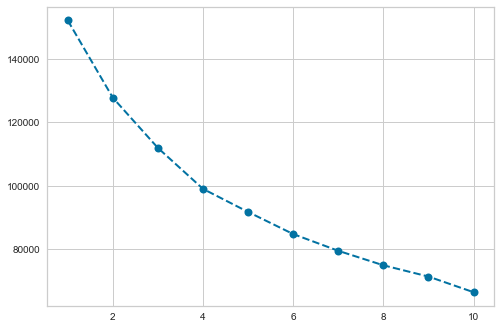

In [26]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_scaled)
    wss.append(k_means.inertia_)

plt.plot(range(1,11),wss, marker='o', linestyle='dashed',
      linewidth=2, markersize=8);  

# Es ergibt sich keine klare Aussage. Am ehesten lässt sich eine Veränderung der Kurve bei 4 Clustern erkennen.

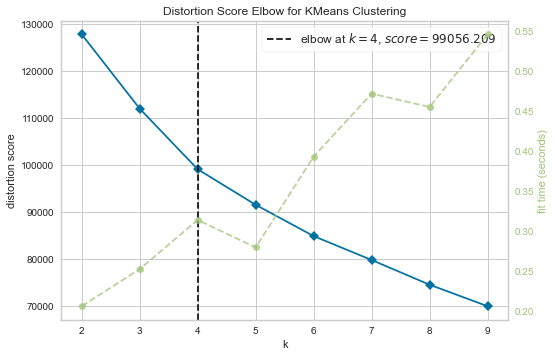

In [27]:
model = KMeans(random_state=42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df_scaled)      
visualizer.show();
# Dieses Modell ergibt ebenfalls einen Wert von 4 Clustern als Optimum. 
# Aufgrund der Darstellung lässt sich die Clusteranzahl hier besser ablesen.

#### Silhouette Methode
Diese Methode berechnet die durchschnittliche Silhouette der Beobachtungen für verschiedene Werte von k. Die optimale Anzahl von Clustern k ist diejenige, die die durchschnittliche Silhouette über einen Bereich von möglichen Werten für k maximiert.

In [29]:
sil_score = []
sil_width_min = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state = 123)
    k_means.fit(df_scaled)
    labels = k_means.labels_
    score = silhouette_score(df_scaled,labels, random_state = 123)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")
    min_width = silhouette_samples(df_scaled,labels).min()
    sil_width_min.append(min_width)
    print(f"The Silhouette Width of {i} clusters : {min_width}")

The Silhouette Score of 2 clusters : 0.21011538174911104
The Silhouette Width of 2 clusters : -0.12022862046135345
The Silhouette Score of 3 clusters : 0.25024581445132676
The Silhouette Width of 3 clusters : -0.2144714947548921
The Silhouette Score of 4 clusters : 0.19746939391267307
The Silhouette Width of 4 clusters : -0.2862064676047911
The Silhouette Score of 5 clusters : 0.19086355518236028
The Silhouette Width of 5 clusters : -0.29794154350144186
The Silhouette Score of 6 clusters : 0.20247130426202847
The Silhouette Width of 6 clusters : -0.3148882251948759
The Silhouette Score of 7 clusters : 0.20947811556563029
The Silhouette Width of 7 clusters : -0.30925827202418577
The Silhouette Score of 8 clusters : 0.20077276294582191
The Silhouette Width of 8 clusters : -0.27936303613341895
The Silhouette Score of 9 clusters : 0.21349710061687815
The Silhouette Width of 9 clusters : -0.30791378014854615
The Silhouette Score of 10 clusters : 0.2200752896948639
The Silhouette Width of 10

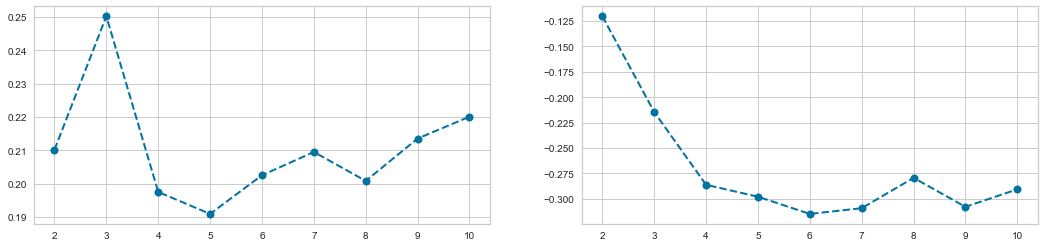

In [30]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.plot(range(2,11),sil_score, marker='o', linestyle='dashed',linewidth=2, markersize=8);
plt.subplot(1,2,2)
plt.plot(range(2,11),sil_width_min, marker='o', linestyle='dashed',linewidth=2, markersize=8);

# Der Silhouette Score ist bei k=3 am höchsten, wir würden also 3 Cluster bevorzugen.
# In Kombination mit der Elbow-Methode sehen wir, dass möglicherweise 3 oder 4 die optimale Cluster-Anzahl darstellt.

#### Gap-Statistik
Die Gap-Statistik vergleicht die Gesamtvariation innerhalb von Clustern für verschiedene Werte von k mit ihren erwarteten Werten unter der Null-Referenzverteilung der Daten. Die Schätzung der optimalen Cluster wird der Wert sein, der die Gap-Statistik maximiert (d. h. der die größte Gap-Statistik ergibt). Dies bedeutet, dass die Clusterstruktur weit von der zufälligen Gleichverteilung der Punkte entfernt ist.

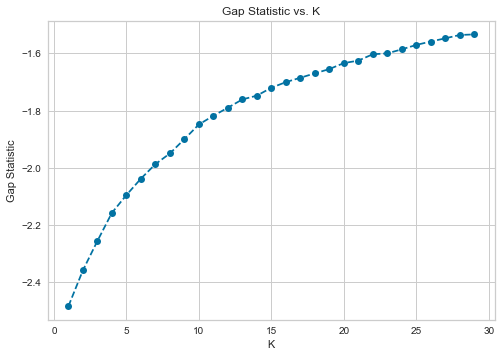

In [32]:
# Gap Statistic for K means
def optimalK(df_scaled, nrefs=3, maxClusters=30):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=df_scaled.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(df_scaled)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_scaled, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

# Die Gab-Statistik wird bei 29 Clustern maximiert. Ein gewisser Unterschied ist auch hier bei 4 zu sehen, 
# da ab 4 die Abstände zwischen den Punkten deutlich abnehmen.

## Training the Model

### Clustering, k-Means-Methode

In [59]:
kmean= KMeans(4)
kmean.fit(df_scaled)
labels=kmean.labels_

In [60]:
clusters=pd.concat([df_scaled, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

pca1      pca2  cluster
0 -1.683380 -1.072976        2
1 -1.134951  2.507231        1
2  0.969543 -0.383317        0
3 -0.884653  0.013197        2
4 -1.599795 -0.684167        2

In [75]:
# Verteilung der Kunden pro Cluster in %
table = (clusters["cluster"].value_counts(normalize=True)*100).round()
table

1    44.0
0    37.0
3    14.0
2     6.0
Name: cluster, dtype: float64

KeyError: 'cluster'

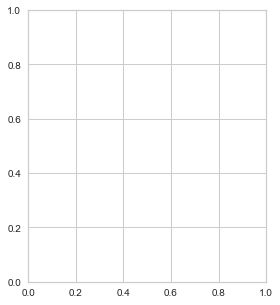

In [82]:
#for c in clusters:
   # grid= sns.FacetGrid(clusters, col='cluster')
  #  grid.map(plt.hist, c) 
    
    
for i in df_scaled.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=df_scaled[df_scaled['cluster']==j]
        cluster[i].hist(bins=20)
        
    plt.show()

### Principal Component Analysis - PCA
PCA reduziert die Daten zur Visualisierung auf 2 Dimensionen.
Es wird ein großer Satz von Variablen in einen kleineren Satz umgewandelt, der immer noch die meisten Informationen des großen Satzes enthält.

In [63]:
# dimensinality reduction 

pca=PCA(n_components=2)

pcafit=pca.fit_transform(df_scaled)
pcafit

array([[-1.68338014, -1.07297552],
       [-1.1349508 ,  2.5072314 ],
       [ 0.96954342, -0.38331667],
       ...,
       [-0.92858014, -1.8088982 ],
       [-2.33760929, -0.65509017],
       [-0.55771326, -0.40190186]])

In [64]:
pca_df = pd.DataFrame(data=pcafit,columns=['pca1','pca2'])
pca_df

pca1      pca2
0    -1.683380 -1.072976
1    -1.134951  2.507231
2     0.969543 -0.383317
3    -0.884653  0.013197
4    -1.599795 -0.684167
...        ...       ...
8945 -0.362005 -2.013828
8946 -0.584165 -1.685985
8947 -0.928580 -1.808898
8948 -2.337609 -0.655090
8949 -0.557713 -0.401902

[8950 rows x 2 columns]

In [78]:


pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)
pca_df


NameError: name 'label' is not defined

In [73]:
# Visualisierung der gebildeten 4 Cluster
plt.figure(figsize=(12,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow'])

# Wir erkennen 4 relativ gut abgegrenzte Cluster.

ValueError: Could not interpret value `cluster` for parameter `hue`

<Figure size 864x720 with 0 Axes>

In [67]:
# Visualisierung:
# PURCHASES (Betrag der Käufe, die vom Konto getätigt wurden) 
# vs ONEOFF_PURCHASES (Maximaler Kaufbetrag, der auf einmal getätigt wurde)

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(clusters)
clusters['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster',
               palette=['red','green','blue','yellow'])
plt.title('Distribution of Clusters based on ONEOFF_PURCHASES and total PURCHASES')
plt.show()

ValueError: Could not interpret value `ONEOFF_PURCHASES` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [68]:
# Visualisierung:
# PURCHASES (Betrag der Käufe, die vom Konto getätigt wurden) 
# vs CREDIT_ LIMIT (Limit der Kreditkarte des Benutzers)

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(clusters)
clusters['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster',
               palette=['red','green','blue','yellow'])
plt.title('Distribution of Clusters based on PURCHASES and CREDIT LIMIT')
plt.show()

ValueError: Could not interpret value `CREDIT_LIMIT` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [69]:
# Visualisierung:
# PURCHASES (Betrag der Käufe, die vom Konto getätigt wurden) 
# vs PURCHASES_FREQUENCY (Wie häufig werden die Einkäufe getätigt)

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(clusters)
clusters['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='PURCHASES_FREQUENCY', y='PURCHASES', hue='cluster',
               palette=['red','green','blue','yellow'])
plt.title('Distribution of Clusters based on PURCHASES and PURCHASES_FREQUENCY')
plt.show()

ValueError: Could not interpret value `PURCHASES_FREQUENCY` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [ ]:
# Visualisierung:
# PURCHASES (Betrag der Käufe, die vom Konto getätigt wurden) 
# vs BALANCE (Saldo, der auf dem Konto verbleibt, um Einkäufe zu tätigen)

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(clusters)
clusters['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='BALANCE', y='PURCHASES', hue='cluster',
               palette=['red','green','blue','yellow'])
plt.title('Distribution of Clusters based on PURCHASES and BALANCE')
plt.show()

In [ ]:
# Visualisierung:
# PURCHASES (Betrag der Käufe, die vom Konto getätigt wurden) 
# vs PURCHASES_TRX (Anzahl der getätigten Kauftransaktionen)

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(clusters)
clusters['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='PURCHASES_TRX', y='PURCHASES', hue='cluster',
               palette=['red','green','blue','yellow'])
plt.title('Distribution of Clusters based on PURCHASES and PURCHASES_TRX')
plt.show()

# Auswertung der Ergebnisse



Die Visualsierung der Cluster hat eine relativ deutliche Abgrenzung der Cluster voneinander erkennen lassen und kann somit als erfolgreich gewertet werden.      

**Charakterisierung der Cluster:**   
- Cluster 3 (gelb): 47 %    
BALANCE niedrig / PURCHASES hoch ➡ Der Träumer  
Wenig Geld auf dem Konto, häufige Nutzung der Kreditkarte für kleine bis mittlere Beträge, häufig Ratenzahlung, niedriges Kreditkartenlimit    

- Cluster 1 (grün): 37 %  
BALANCE hoch/ PURCHASES niedrig ➡ Der Schwabe   
Viel Geld auf dem Konto, häufige Nutzung der Kreditkarte für kleine Beträge, häufig Ratenzahlung, hohes Kreditkartenlimit    

- Cluster 0: (rot): 14 %  
BALANCE niedrig / PURCHASES niedrig ➡ Der Wirtschaftliche  
Wenig Geld auf dem Konto, wenige Käufe- sowohl per Vorkasse als auch per Ratenkauf, niedriges Kreditkartenlimit  

- Cluster 2: (blau): 3 %  
BALANCE hoch / PURCHASES hoch ➡ Der Bourgeoise   
Viel Geld auf dem Konto, häufige Nutzung der Kreditkarte für mittlere bis hohe Beträge, wenig Ratenzahlung, hohe Beträge per Vorauskasse, hohes Kreditkartenlimit  

 
# Fazit 
(1 Absatz)
- Wie zufrieden sind wir mit der Methode
- Gibt es Verbesserung / andere Methoden und Modell



**Bibliographie**